# **(1) 10년, 14년, 20년 데이터 보간**
###**→ 아래와 같이 다양한 보간법을 적용하며, 최적의 연도와 보간방법을 찾고자 함.**


---


**1.   1차 선형보간**

- 1차 선형보간은 두 점 사이의 결측값을 직선으로 연결하여 예측하는 방법

- 정의: 두 점
(
𝑥
0
,
𝑦
0
)
(x
0
​
 ,y
0
​
 )와
(
𝑥
1
,
𝑦
1
)
(x
1
​
 ,y
1
​
 ) 사이의 점
𝑥
x에서의 값
𝑦
y는 다음과 같이 계산됨

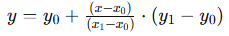

- 장점: 구현이 쉽고 빠르며, 계산 비용이 낮음. 데이터가 비교적 일정하게 변화하는 경우에 적합함.

- 단점: 데이터가 비선형적으로 변화하는 경우 정확도가 떨어질 수 있으며, 경계에서의 보간이 불안정할 수 있음.



---


**2.   2차 선형보간**

2차 선형보간은 세 점을 이용하여 결측값을 보간하는 방법이며, 보통 이차 다항식을 사용함.

- 정의: 세 점
(
𝑥
0
,
𝑦
0
)
(x
0
​
 ,y
0
​
 ),
(
𝑥
1
,
𝑦
1
)
(x
1
​
 ,y
1
​
 ),
(
𝑥
2
,
𝑦
2
)
(x
2
​
 ,y
2
​
 )를 이용하여
𝑦
y를 다음과 같이 계산
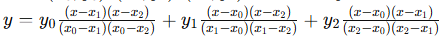


- 장점: 데이터가 이차 곡선을 따를 때 정확도가 높으며, 보다 유연한 보간이 가능

- 단점: 계산이 1차 보간보다 복잡하며, 경계에서의 불안정성 문제는 여전히 존재함

---

**3.   평균 대치법**
평균 대치법은 결측값을 해당 변수의 평균값으로 대체하는 방법

- 정의: 결측값을 대체할 변수
𝑥
x의 평균
𝑥
ˉ
x
ˉ
 로 모든 결측값을 대체

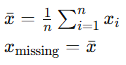


- 장점: 구현이 매우 간단하고 빠르며, 결측값이 적을 때 효과적일 수 있음.

- 단점: 데이터의 분산을 과소평가할 수 있으며, 상관관계를 왜곡시킬 수 있음.

---
**4.   0 대치**
결측값을 0으로 대체하는 방법

- 정의: 모든 결측값을 0으로 대체
image.png


- 장점: 간단하고 빠르며, 특정상황에서 의미가 있을 수 있음

- 단점: 데이터의 특성을 왜곡할 가능성이 높고, 결측값이 많을 때 비현실적인 값이 됨

---
**5.   KNN 보간법**
KNN 보간법은 결측값을 해당 값의 K개 가까운 이웃의 값들로 대체하는 방법

- 정의: 결측값을 K개의 최근접 이웃의 평균으로 대체합니다. 이웃은 유클리드 거리 등을 이용해 결정

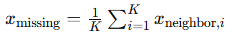

- 장점: 데이터의 지역적 패턴을 보존하며, 다양한 데이터 타입에 적용 가능함

- 단점: 계산 비용이 높고, k에 따라 결과에 큰 영향을 미침

---
**6.   다중대치법(MICE)**
결측값을 여러 번 대치하고, 대치된 여러 데이터 세트를 결합하여 최종 분석을 수행하는 방법

- 정의:

(1) 각 변수의 결측값을 예측하기 위한 모델을 설정합니다.

(2) 초기 대치를 수행하여 결측값을 임의로 채웁니다.

(3) 각 변수에 대해 반복적으로 대치를 수행합니다.

(4) 모든 변수에 대한 대치가 완료되면 여러 데이터 세트를 생성합니다.

(5) 생성된 데이터 세트를 합쳐 최종 분석을 수행합니다.


- 장점: 다양한 대치 결과를 반영하여 불확실성을 줄이고, 다양한 모델을 적용할 수 있어 유연함

- 단점: 계산비용이 높고 복잡한 구현이 필요


In [6]:
#pip install fancyimpute
#pip install spicy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer
from spicy import interpolate
from scipy.interpolate import interp1d

In [7]:
y10 = pd.read_csv('y10.csv')
y14 = pd.read_csv('y14.csv')
y20 = pd.read_csv('y20.csv')
y20.drop(y20.index[-1], inplace=True)   #2003년에서 2022년
print(y10.shape, y14.shape, y20.shape, end='\n')

(11, 67) (14, 67) (20, 67)


In [9]:
###10년 보간 적용
df=y10
# 1. 1차 선형보간법, interpolate
df_linear =df.interpolate(method = 'linear') #1차 선형보간

# 2. 2차 선형보간법, interpolate
#df_quadratic =df.interpolate(method = 'quadratic') #2차 선형보간

# 3. 평균대치법
imputer_mean =SimpleImputer(strategy='mean')
df_mean =imputer_mean.fit_transform(df) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean, columns = df.columns)

# 4.0값으로 대체
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero =df.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=df.columns)

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice=mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=df.columns)

print(df_mean.isnull().sum().sum(),end='\n')
print(df_zero.isnull().sum().sum(),end='\n')
print(df_knn.isnull().sum().sum(),end='\n')
print(df_mice.isnull().sum().sum(),end='\n')
print(df_linear.isnull().sum().sum(),end='\n')
#print(df_linear.isna().sum().to_string())   #앞뒤 큰 공백을 보간하지 못함을 확인

0
0
0
0
91


Text(0.5, 1.0, 'df_mice')

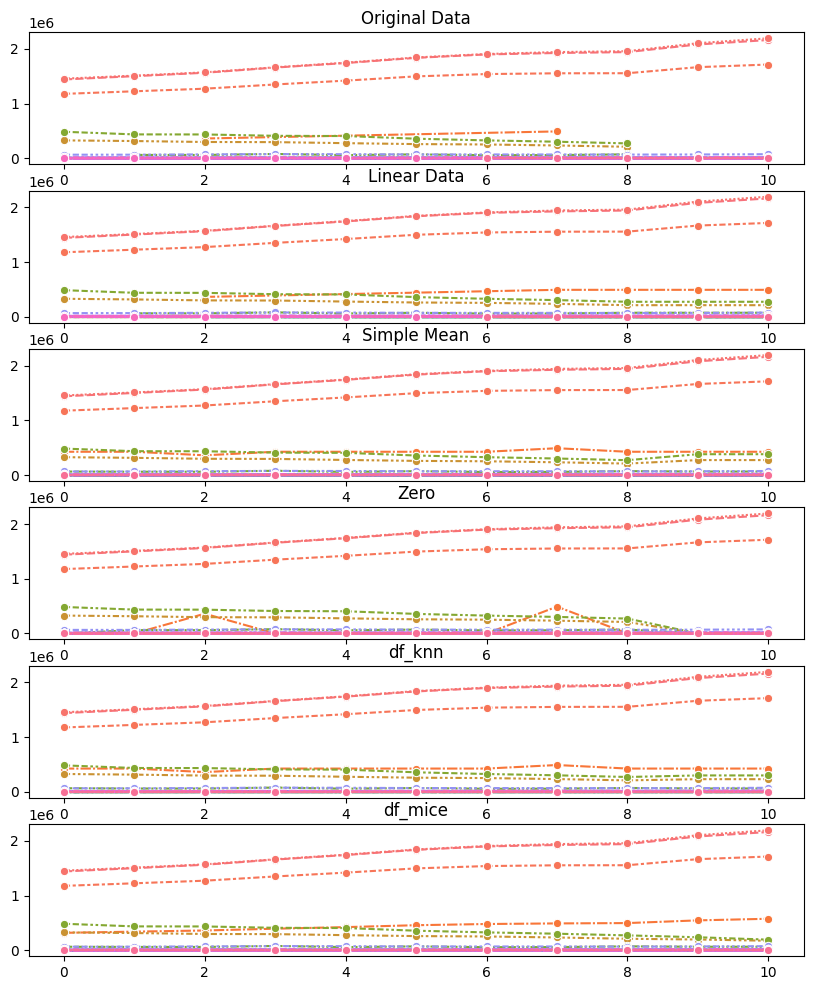

In [10]:
# 시각화
fig, axs = plt.subplots(6,1,figsize=(10,12))
sns.lineplot(data= df, marker='o', ax=axs[0], legend=False)
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear , marker='o', ax=axs[1], legend=False)
axs[1].set_title('Linear Data')
sns.lineplot(data=df_mean , marker='o', ax=axs[2], legend=False)
axs[2].set_title('Simple Mean')
sns.lineplot(data=df_zero , marker='o', ax=axs[3], legend=False)
axs[3].set_title('Zero')
sns.lineplot(data=df_knn , marker='o', ax=axs[4], legend=False)
axs[4].set_title('df_knn')
sns.lineplot(data=df_mice , marker='o', ax=axs[5], legend=False)
axs[5].set_title('df_mice')

In [11]:
###14년 보간 적용
df=y14
df = df.replace('-', np.nan)

# 1. 1차 선형보간법, interpolate
df_linear =df.interpolate(method = 'linear') #1차 선형보간

# 2. 2차 선형보간법, interpolate
df_quadratic =df.interpolate(method = 'quadratic') #2차 선형보간

# 3. 평균대치법
imputer_mean =SimpleImputer(strategy='mean')
df_mean =imputer_mean.fit_transform(df) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean, columns = df.columns)

# 4.0값으로 대체
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero =df.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=df.columns)

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice=mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=df.columns)

print(df_linear.isnull().sum().sum(),end='\n')
print(df_mean.isnull().sum().sum(),end='\n')
print(df_zero.isnull().sum().sum(),end='\n')
print(df_knn.isnull().sum().sum(),end='\n')
print(df_mice.isnull().sum().sum(),end='\n')

160
0
0
0
0


Text(0.5, 1.0, 'Quadratic Data')

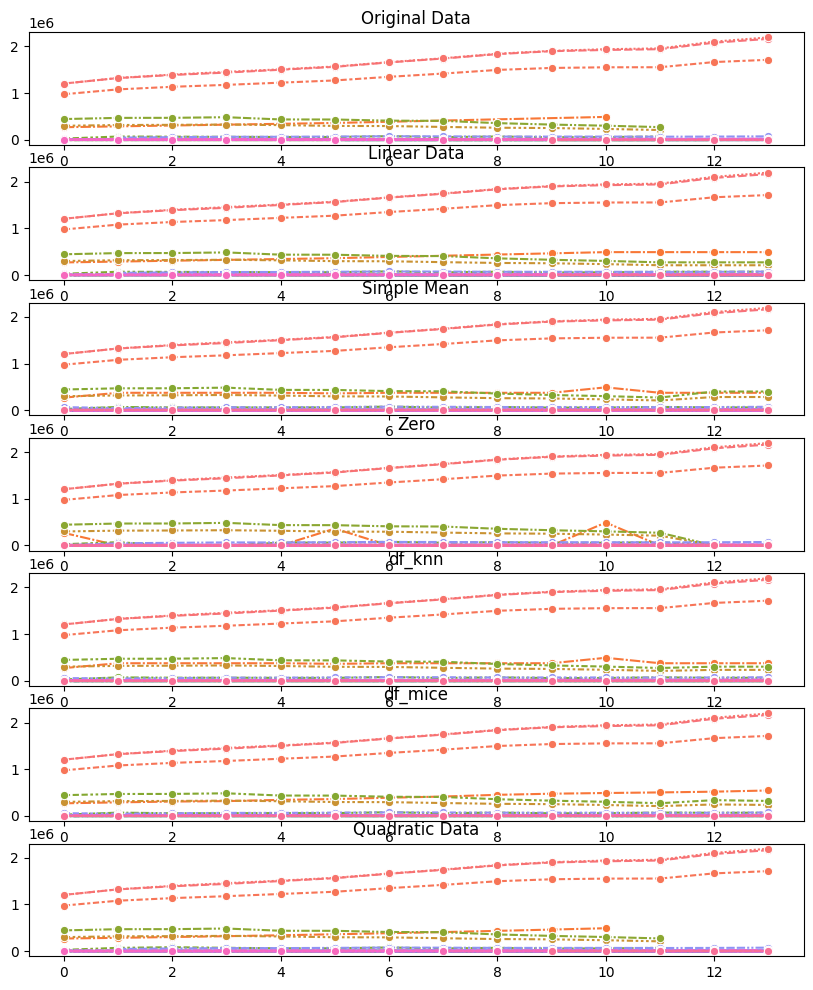

In [12]:
# 시각화

fig, axs = plt.subplots(7,1,figsize=(10,12))
sns.lineplot(data= df, marker='o', ax=axs[0], legend=False)
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear , marker='o', ax=axs[1], legend=False)
axs[1].set_title('Linear Data')
sns.lineplot(data=df_mean , marker='o', ax=axs[2], legend=False)
axs[2].set_title('Simple Mean')
sns.lineplot(data=df_zero , marker='o', ax=axs[3], legend=False)
axs[3].set_title('Zero')
sns.lineplot(data=df_knn , marker='o', ax=axs[4], legend=False)
axs[4].set_title('df_knn')
sns.lineplot(data=df_mice , marker='o', ax=axs[5], legend=False)
axs[5].set_title('df_mice')
sns.lineplot(data=df_quadratic , marker='o', ax=axs[6], legend=False)
axs[6].set_title('Quadratic Data')

In [13]:
###20년 보간 적용
df=y20
df = df.replace('-', np.nan)

# 1. 1차 선형보간법, interpolate
df_linear =df.interpolate(method = 'linear') #1차 선형보간

# 2. 2차 선형보간법, interpolate
df_quadratic =df.interpolate(method = 'quadratic') #2차 선형보간

# 3. 평균대치법
imputer_mean =SimpleImputer(strategy='mean')
df_mean =imputer_mean.fit_transform(df) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean, columns = df.columns)

# 4.0값으로 대체
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero =df.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=df.columns)

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice=mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=df.columns)

print(df_linear.isnull().sum().sum(),end='\n')
print(df_mean.isnull().sum().sum(),end='\n')
print(df_zero.isnull().sum().sum(),end='\n')
print(df_knn.isnull().sum().sum(),end='\n')
print(df_mice.isnull().sum().sum(),end='\n')

433
0
0
0
0


Text(0.5, 1.0, 'Quadratic Data')

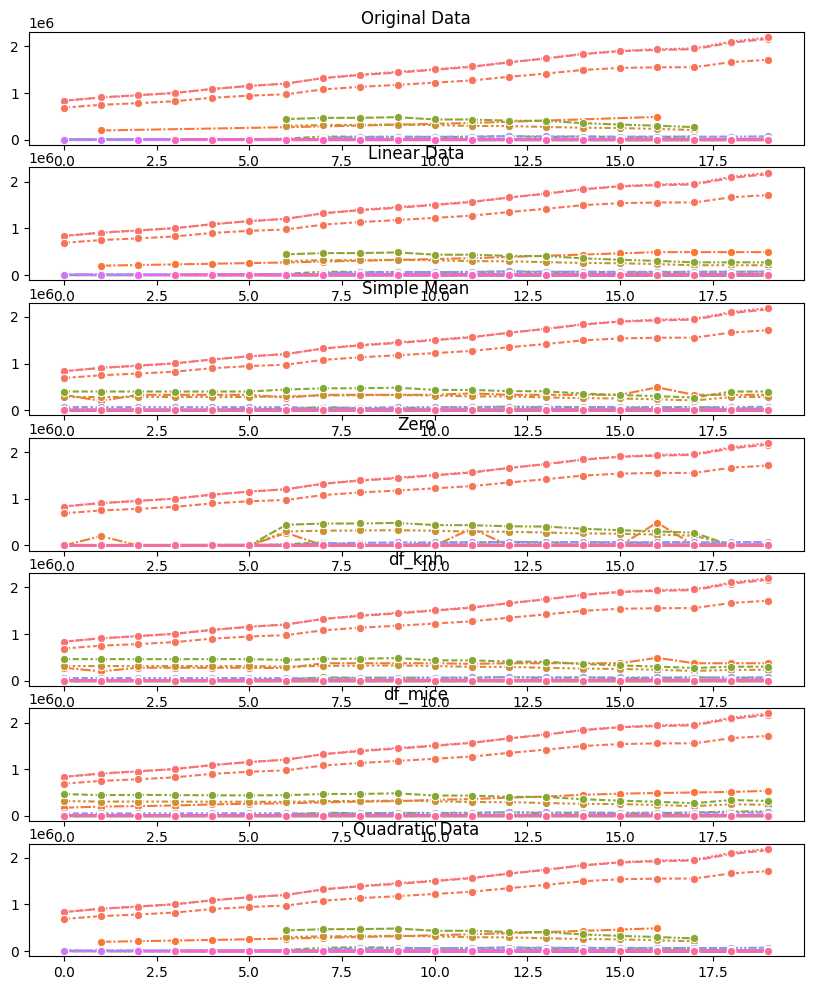

In [14]:
# 시각화

fig, axs = plt.subplots(7,1,figsize=(10,12))
sns.lineplot(data= df, marker='o', ax=axs[0], legend=False)
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear , marker='o', ax=axs[1], legend=False)
axs[1].set_title('Linear Data')
sns.lineplot(data=df_mean , marker='o', ax=axs[2], legend=False)
axs[2].set_title('Simple Mean')
sns.lineplot(data=df_zero , marker='o', ax=axs[3], legend=False)
axs[3].set_title('Zero')
sns.lineplot(data=df_knn , marker='o', ax=axs[4], legend=False)
axs[4].set_title('df_knn')
sns.lineplot(data=df_mice , marker='o', ax=axs[5], legend=False)
axs[5].set_title('df_mice')
sns.lineplot(data=df_quadratic , marker='o', ax=axs[6], legend=False)
axs[6].set_title('Quadratic Data')

# **(2) 20년 데이터 분기로 변형 및 보간**
### **→ 상기 자료가 요인분석 검정을 통과하지 못하는 이슈로 인해, 데이터 수를 늘리기를 시도함**

---

### **→ 위와 동일한 방법으로 1차 진행**

---

**1.   1차 선형보간**

**2.   2차 선형보간**

**3.   평균 대치법**

**4.   0 대치**

**5.   KNN 보간법**

**6.   다중대치법(MICE)**



---



### **→ 보간 방법을 추가하여 2차 진행**



---
**1.   polyonmial**

**2.   time**

**3.   index**

**4.   nearest**

**5.   slinear**

**6.   cubic**

**7.   barycentric**

**8.   krogh**

**9.   spline**

**10.   from_derivatives**

**11.   piecewise_polynomial**

**12.   pchip**

**13.   akima**

**14.   cubicspline**

---


### 1. Polynomial Interpolation (다항식 보간)
다항식 보간은 주어진 데이터 점들을 정확히 지나는 다항식을 찾는 방법입니다.

**정의**:
\( n \)개의 데이터 점이 주어졌을 때, \( n-1 \)차 다항식 \( P(x) \)를 찾아 데이터 점을 모두 지나는 다항식을 만듭니다.
\[ P(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_{n-1} x^{n-1} \]

**장점**:
- 모든 데이터 점을 정확히 지남.

**단점**:
- 데이터 점이 많아질수록 오버피팅 문제가 발생할 수 있음.
- 높은 차수의 다항식은 수치적으로 불안정할 수 있음.
---
### 2. Time Interpolation (시간 보간)
시간 보간은 시간 축을 기준으로 데이터를 보간하는 방법입니다. 시간 시계열 데이터에서 자주 사용됩니다.

**정의**:
시간을 독립 변수로 하여 결측값을 보간합니다. 선형 보간, 스플라인 보간 등 다양한 방법이 사용될 수 있습니다.

**장점**:
- 시간 시계열 데이터에서 자연스럽게 사용 가능.
- 데이터를 시간 흐름에 따라 보간할 수 있음.

**단점**:
- 시간 간격이 일정하지 않은 경우 복잡할 수 있음.
- 시간에 따라 변하는 패턴을 정확히 반영하기 어려울 수 있음.
---
### 3. Index Interpolation (인덱스 보간)
인덱스 보간은 데이터의 인덱스를 기준으로 보간하는 방법입니다. 보통 데이터가 균등하게 분포된 경우에 사용됩니다.

**정의**:
데이터의 인덱스를 독립 변수로 하여 결측값을 보간합니다. 선형 보간, 스플라인 보간 등 다양한 방법이 사용될 수 있습니다.

**장점**:
- 균등하게 분포된 데이터에 적합.
- 간단하고 직관적임.

**단점**:
- 인덱스 간격이 불규칙한 경우 어려움.
- 데이터의 실제 값이 아닌 인덱스 기반이므로 해석이 어려울 수 있음.
---
### 4. Nearest Interpolation (가장 가까운 값 보간)
가장 가까운 값 보간은 각 결측값을 가장 가까운 데이터 점의 값으로 대체하는 방법입니다.

**정의**:
결측값 \( x \)에 가장 가까운 데이터 점 \( x_i \)의 값 \( y_i \)를 사용합니다.
\[ y = y_i \]

**장점**:
- 계산이 매우 간단하고 빠름.
- 데이터가 계단 형태로 분포하는 경우 적합.

**단점**:
- 보간 결과가 불연속적일 수 있음.
- 데이터의 부드러운 변화를 반영하지 못함.
---
### 5. Slinear Interpolation (선형 보간)
선형 보간은 두 점 사이를 직선으로 연결하여 결측값을 예측하는 방법입니다.

**정의**:
\[ y = y_0 + \frac{(x - x_0)}{(x_1 - x_0)} \cdot (y_1 - y_0) \]

**장점**:
- 간단하고 빠름.
- 데이터가 선형적으로 변화할 때 적합.

**단점**:
- 데이터가 비선형적으로 변화할 때 정확도가 떨어질 수 있음.
---
### 6. Cubic Interpolation (3차 보간)
3차 보간은 각 구간을 3차 다항식으로 보간하는 방법입니다.

**정의**:
\[ S_i(x) = a_i + b_i (x - x_i) + c_i (x - x_i)^2 + d_i (x - x_i)^3 \]
각 구간 \( [x_i, x_{i+1}] \)에 대해 3차 다항식 \( S_i(x) \)를 찾습니다.

**장점**:
- 데이터의 변화를 부드럽게 반영함.
- 보다 복잡한 패턴을 반영할 수 있음.

**단점**:
- 계산이 선형 보간보다 복잡함.
- 오버피팅 가능성 있음.
---
### 7. Barycentric Interpolation (중심간 보간)
중심간 보간은 다항식 보간의 안정성을 개선하기 위한 방법입니다.

**정의**:
주어진 데이터 점들에 대해 중심간 무게를 계산하여 보간 다항식을 구성합니다.
\[ P(x) = \sum_{j=0}^{n} \frac{w_j}{x - x_j} \cdot y_j \]
여기서 \( w_j \)는 중심간 무게입니다.

**장점**:
- 다항식 보간보다 수치적으로 안정적임.
- 구현이 비교적 간단함.

**단점**:
- 여전히 높은 차수에서 불안정할 수 있음.
---
### 8. Krogh Interpolation (Hermite Interpolation)
Krogh 보간은 함수값과 그 도함수 값을 동시에 보간하는 방법입니다.

**정의**:
주어진 데이터 점들과 그 도함수 값들을 사용하여 Hermite 다항식을 구성합니다.

**장점**:
- 함수의 도함수 값까지 고려하여 부드러운 보간이 가능.
- 특정 응용에서 높은 정확도를 제공.

**단점**:
- 구현이 복잡함.
- 계산 비용이 높을 수 있음.
---
### 9. Spline Interpolation (스플라인 보간)
스플라인 보간은 데이터 점들 사이를 매끄럽게 연결하는 조각 다항식을 사용하는 방법입니다.

**정의**:
구간마다 낮은 차수의 다항식을 사용하여 각 구간을 연결합니다. 대표적으로 3차 스플라인이 많이 사용됩니다.

**장점**:
- 데이터가 부드럽게 연결됨.
- 다양한 형태의 스플라인이 존재 (예: Cubic Spline, B-Spline).

**단점**:
- 구현이 비교적 복잡함.
- 경계 조건에 민감할 수 있음.
---
### 10. From Derivatives (도함수 보간)
도함수 보간은 주어진 데이터 점과 그 도함수 값을 사용하여 보간하는 방법입니다.

**정의**:
주어진 데이터 점 \((x_i, y_i)\)와 도함수 값 \((x_i, y'_i)\)을 사용하여 보간 다항식을 구성합니다.

**장점**:
- 함수의 부드러운 변화를 잘 반영할 수 있음.
- 특정 상황에서 높은 정확도 제공.

**단점**:
- 데이터의 도함수 값이 필요함.
- 계산이 복잡할 수 있음.
---
### 11. Piecewise Polynomial Interpolation (조각 다항식 보간)
조각 다항식 보간은 각 구간을 낮은 차수의 다항식으로 보간하는 방법입니다.

**정의**:
데이터 점들 사이를 여러 구간으로 나누어 각 구간을 다항식으로 보간합니다.

**장점**:
- 전체 데이터의 변화를 잘 반영함.
- 각 구간에서 자유롭게 다항식을 선택할 수 있음.

**단점**:
- 구간 경계에서의 연속성과 매끄러움 보장이 필요함.
- 복잡한 구현 필요.
---
### 12. PCHIP (Piecewise Cubic Hermite Interpolating Polynomial)
PCHIP 보간은 각 구간을 3차 Hermite 다항식으로 보간하는 방법입니다.

**정의**:
각 구간을 3차 Hermite 다항식을 사용하여 보간합니다. 함수값과 그 도함수 값을 사용하여 보간 다항식을 구성합니다.

**장점**:
- 데이터의 변화를 부드럽게 반영함.
- 각 구간에서 3차 다항식 사용으로 높은 정확도 제공.

**단점**:
- 구현이 복잡할 수 있음.
- 계산 비용이 높음.
---
### 13. Akima Interpolation (아키마 보간)
아키마 보간은 불연속적인 데이터 점을 부드럽게 연결하기 위한 방법입니다.

**정의**:
인접한 데이터 점들 간의 기울기를 계산하여 보간 다항식을 구성합니다.

**장점**:
- 데이터의 불연속성에 민감하지 않음.
- 부드러운 보간 가능.

**단점**:
- 특정 상황에서 과매끄러움이 발생할 수 있음.
- 계산 비용이 높음.
---
### 14. CubicSpline (3차 스플라인)
3차 스플라인은 각 구간을 3차 다항식으로 보간하는 방법입니다.

**정의**:
\[ S_i(x) = a_i + b_i (x - x_i) + c_i (x - x_i)^2 + d_i (x - x_i)^3 \]
각 구간 \( [x_i, x_{i+1}] \)에 대해 3차 다항식 \( S_i(x

) \)를 찾습니다.

**장점**:
- 데이터의 변화를 부드럽게 반영함.
- 각 구간의 연속성과 매끄러움을 보장함.

**단점**:
- 경계 조건 설정이 중요함.
- 구현이 복잡할 수 있음.

각 보간 방법은 데이터의 특성과 분석 목적에 따라 적절히 선택해야 합니다. 각 방법은 장단점이 있으며, 데이터의 분포와 변화를 고려하여 가장 적합한 방법을 선택하는 것이 중요합니다.

### **1차 진행**
- 기존 method

In [23]:
df=pd.read_csv('data2qs.csv',encoding='cp949')
df = df.drop(df.columns[0], axis=1)
df.shape

(80, 36)

In [24]:
# 1. 1차 선형보간법, interpolate
df_linear =df.interpolate(method = 'linear') #1차 선형보간

# 2. 2차 선형보간법, interpolate
df_quadratic =df.interpolate(method = 'quadratic') #2차 선형보간

# 3. 평균대치법
imputer_mean =SimpleImputer(strategy='mean')
df_mean =imputer_mean.fit_transform(df) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean, columns = df.columns)

# 4.0값으로 대체
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero =df.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=df.columns)

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice=mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=df.columns)

print(df_linear.isnull().sum().sum(),end='\n')
print(df_mean.isnull().sum().sum(),end='\n')
print(df_zero.isnull().sum().sum(),end='\n')
print(df_knn.isnull().sum().sum(),end='\n')
print(df_mice.isnull().sum().sum(),end='\n')
print(df_quadratic.isnull().sum().sum(),end='\n')

428
0
0
0
0
608


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Text(0.5, 1.0, 'Quadratic Data')

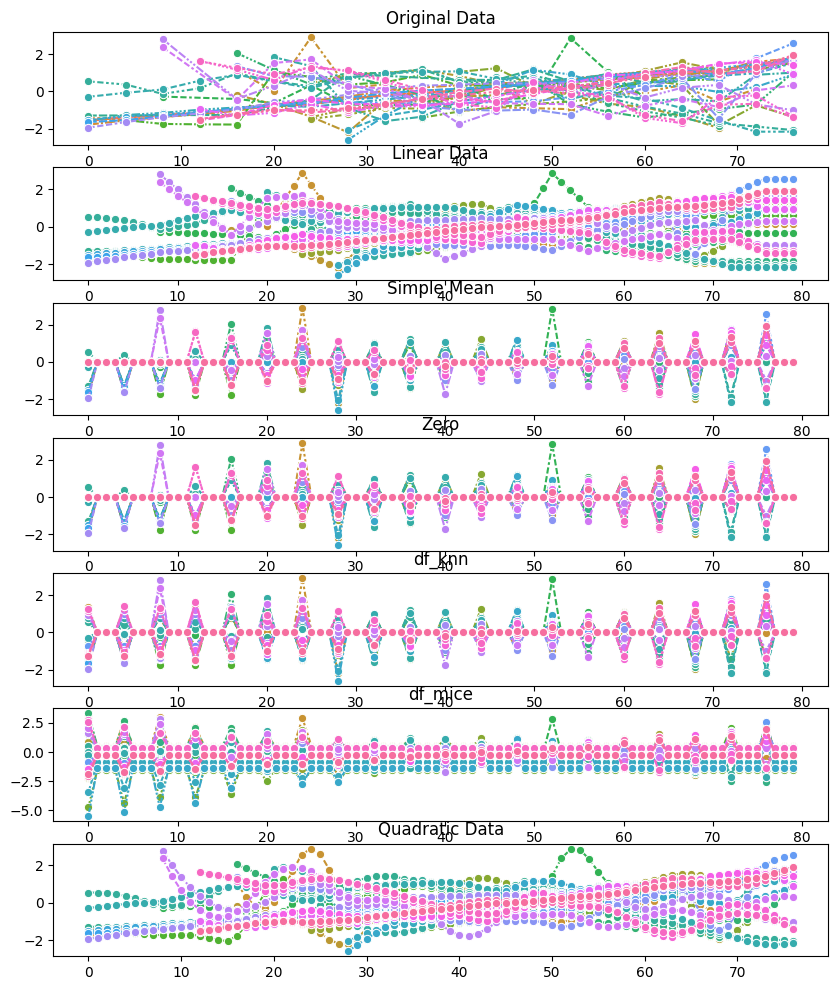

In [25]:
# 시각화

fig, axs = plt.subplots(7,1,figsize=(10,12))
sns.lineplot(data= df, marker='o', ax=axs[0], legend=False)
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear , marker='o', ax=axs[1], legend=False)
axs[1].set_title('Linear Data')
sns.lineplot(data=df_mean , marker='o', ax=axs[2], legend=False)
axs[2].set_title('Simple Mean')
sns.lineplot(data=df_zero , marker='o', ax=axs[3], legend=False)
axs[3].set_title('Zero')
sns.lineplot(data=df_knn , marker='o', ax=axs[4], legend=False)
axs[4].set_title('df_knn')
sns.lineplot(data=df_mice , marker='o', ax=axs[5], legend=False)
axs[5].set_title('df_mice')
sns.lineplot(data=df_quadratic , marker='o', ax=axs[6], legend=False)
axs[6].set_title('Quadratic Data')

In [ ]:
#data 추출
df_quadratic.to_csv('df_quadratic.csv', index=False)
df_mice.to_csv('df_mice.csv', index=False,encoding='cp949')

### **2차 진행**
- 추가 method

In [19]:
#data
df=pd.read_csv('data2qst.csv',encoding='utf-8')
df2=df
df2['time'] = pd.to_datetime(df['time'])
df2.set_index('time',inplace=True)
df2

,국내총생산.명목.원화표시...십억원.,국민총소득.명목.원화표시...십억원.,국민처분가능소득.명목...십억원.,노동비용총액..천원.,소비자물가지수,보육비_월평균_만원,사교육비_월평균_만원,혼인건수,남자초혼연령,여자초혼연령,...,사교육.참여율...,생활물가지수.2020.100.,스트레스인지율...,주관적.건강인지율...,아파트.매매.실거래.평균가격.만원...,연립다세대.매매.실거래.평균가격.만원...,총근로일수..일.,총근로시간..시간.,시간당임금총액..원.,월임금총액..천원.
time,,,,,,,,,,,,,,,,,,,,,
2003-03-31,-1.555511,-1.547181,-1.579588,-1.387131,-1.776829,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.939940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-31,-1.383653,-1.375644,-1.392147,-1.553796,-1.548433,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.639069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,1.646915,1.671936,1.571537,1.766163,1.663841,NaN,NaN,NaN,NaN,NaN,...,1.722315,1.716375,-1.00865,0.32287,0.918784,1.440732,-1.326263,-1.390685,1.921047,1.933722
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#1. polyonmial(다항식 보간)
df2_polynomial=df2.interpolate('polynomial',order=2)
print(df2_polynomial.isnull().sum().sum())
#print(df2_polynomial.to_string())

#2. time
df2_time=df2.interpolate('time')
print(df2_time.isnull().sum().sum())
#print(df2_time.to_string())

#3.index*
df2_index=df2.interpolate('index')
print(df2_index.isnull().sum().sum())

#4. nearest*
df2_nearest=df2.interpolate('nearest')
print(df2_nearest.isnull().sum().sum())

#5. slinear
df2_slinear=df2.interpolate('slinear')
print(df2_slinear.isnull().sum().sum())

#6. cubic
df2_cubic=df2.interpolate('cubic')
print(df2_cubic.isnull().sum().sum())

#7. barycentric*
df2_barycentric=df2.interpolate('barycentric')
print(df2_barycentric.isnull().sum().sum())

#8. krogh*
df2_krogh=df2.interpolate('krogh')
print(df2_krogh.isnull().sum().sum())

#9. spline
df2_spline=df2.interpolate('spline',order=2)
print(df2_spline.isnull().sum().sum())

#10. from_derivatives
df2_from_derivatives=df2.interpolate('from_derivatives')
print(df2_from_derivatives.isnull().sum().sum())

#11. piecewise_polynomial
df2_piecewise_polynomial=df2.interpolate('piecewise_polynomial')
print(df2_piecewise_polynomial.isnull().sum().sum())

#12. pchip
df2_pchip=df2.interpolate('pchip')
print(df2_pchip.isnull().sum().sum())

#13. akima
df2_akima=df2.interpolate('akima')
print(df2_akima.isnull().sum().sum())

#14. cubicspline
df2_cubicspline=df2.interpolate('cubicspline')
print(df2_cubicspline.isnull().sum().sum())

608
428
428
608
608
608
428
1088
428
608
608
428
608
428


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_polyint.py:335: RuntimeWarning: overflow encountered in multiply
  pi = w*pi
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_polyint.py:336: RuntimeWarning: invalid value encountered in multiply
  p += pi[:,np.newaxis] * self.c[k]


Text(0.5, 1.0, 'Cubicspline')

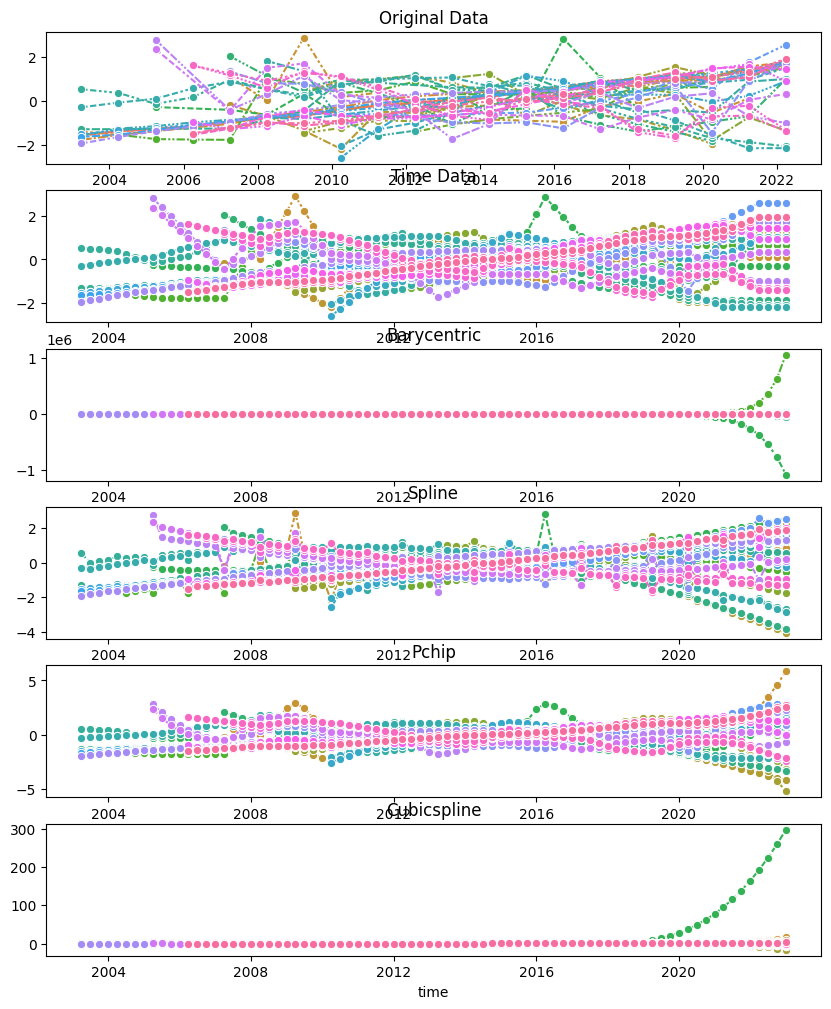

In [21]:
# 시각화
fig, axs = plt.subplots(6,1,figsize=(10,12))
sns.lineplot(data= df2, marker='o', ax=axs[0], legend=False)
axs[0].set_title('Original Data')
sns.lineplot(data=df2_time , marker='o', ax=axs[1], legend=False)
axs[1].set_title('Time Data')
sns.lineplot(data=df2_barycentric , marker='o', ax=axs[2], legend=False)
axs[2].set_title('Barycentric')
sns.lineplot(data=df2_spline , marker='o', ax=axs[3], legend=False)
axs[3].set_title('Spline')
sns.lineplot(data=df2_pchip , marker='o', ax=axs[4], legend=False)
axs[4].set_title('Pchip')
sns.lineplot(data=df2_cubicspline , marker='o', ax=axs[5], legend=False)
axs[5].set_title('Cubicspline')

# **(3) 30년 데이터 보간**
### **→ 상기 자료와 결측치만 보간한 데이터를 비교해보고자 보간을 진행함**
### **→ 방법은 위와 동일**
### **→ 사이값을 다양한 방법으로 채우고 MICE를 통해 앞뒤 결측을 채움**

### **1. 기본 method 보간**
**- 사이값 결측 보간 진행**

In [ ]:
#pip install fancyimpute
#pip install spicy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer
from spicy import interpolate
from scipy.interpolate import interp1d

In [ ]:
df=pd.read_csv('30year_scale.csv',encoding='cp949')

In [ ]:
df2=df
df2

,시점,합계출산율,국내총생산.명목.원화표시...십억원.,국민총소득.명목.원화표시...십억원.,국민처분가능소득.명목...십억원.,노동비용총액..천원.,소비자물가지수,보육비_월평균_만원,혼인건수,남자초혼연령,...,사교육.참여율...,생활물가지수.2020.100.,스트레스인지율...,주관적.건강인지율...,아파트.매매.실거래.평균가격.만원...,연립다세대.매매.실거래.평균가격.만원...,총근로일수..일.,총근로시간..시간.,시간당임금총액..원.,월임금총액..천원.
0,1993,1.741150,-1.505640,-1.491716,-1.507642,-1.629346,-1.788777,NaN,1.450872,-1.605012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,1.749443,-1.404468,-1.392846,-1.395749,-1.629346,-1.625332,NaN,1.291036,-1.539105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995,1.658218,-1.290615,-1.281727,-1.287905,-1.461397,-1.501104,NaN,1.381534,-1.456722,...,NaN,-1.758736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,1.409423,-1.195534,-1.188166,-1.193641,-1.353964,-1.358494,NaN,1.996224,-1.434753,...,NaN,-1.606733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997,1.256000,-1.105238,-1.101190,-1.105567,-1.195802,-1.223571,NaN,1.220821,-1.330400,...,NaN,-1.462923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998,0.953299,-1.113687,-1.116559,-1.146183,-1.014629,-0.985087,NaN,0.959940,-1.198587,...,NaN,-1.208732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1999,0.791583,-1.017942,-1.021392,-1.043534,-0.980188,-0.957345,NaN,0.739001,-1.066773,...,NaN,-1.179163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,1.019645,-0.911705,-0.912859,-0.926767,-0.676490,-0.879633,NaN,0.261163,-0.951437,...,NaN,-1.096333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2001,0.310579,-0.813932,-0.817178,-0.830119,-0.763303,-0.736577,NaN,0.030268,-0.803147,...,NaN,-0.943854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2002,-0.232623,-0.676734,-0.678619,-0.673700,-0.638911,-0.635468,NaN,-0.198045,-0.682318,...,NaN,-0.836086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#1. polyonmial(다항식 보간)
df2_polynomial=df2.interpolate('polynomial',order=2)
print(df2_polynomial.isnull().sum().sum())
#print(df2_polynomial.to_string())

#4. nearest
df2_nearest=df2.interpolate('nearest')
print(df2_nearest.isnull().sum().sum())

#5. slinear
df2_slinear=df2.interpolate('slinear')
print(df2_slinear.isnull().sum().sum())

#6. cubic
df2_cubic=df2.interpolate('cubic')
print(df2_cubic.isnull().sum().sum())

#7. barycentric*
df2_barycentric=df2.interpolate('barycentric')
print(df2_barycentric.isnull().sum().sum())

#8. krogh*
df2_krogh=df2.interpolate('krogh')
print(df2_krogh.isnull().sum().sum())

#9. spline*
df2_spline=df2.interpolate('spline',order=2)
print(df2_spline.isnull().sum().sum())

#10. from_derivatives
df2_from_derivatives=df2.interpolate('from_derivatives')
print(df2_from_derivatives.isnull().sum().sum())

#11. piecewise_polynomial
df2_piecewise_polynomial=df2.interpolate('piecewise_polynomial')
print(df2_piecewise_polynomial.isnull().sum().sum())

#12. pchip*
df2_pchip=df2.interpolate('pchip')
print(df2_pchip.isnull().sum().sum())

#13. akima
df2_akima=df2.interpolate('akima')
print(df2_akima.isnull().sum().sum())

#14. cubicspline*
df2_cubicspline=df2.interpolate('cubicspline')
print(df2_cubicspline.isnull().sum().sum())

305
305
305
305
297
297
297
305
305
297
305
297


In [ ]:
df2['시점'] = pd.to_datetime(df['시점'])
df2.set_index('시점',inplace=True)
df2

,합계출산율,국내총생산.명목.원화표시...십억원.,국민총소득.명목.원화표시...십억원.,국민처분가능소득.명목...십억원.,노동비용총액..천원.,소비자물가지수,보육비_월평균_만원,혼인건수,남자초혼연령,여자초혼연령,...,사교육.참여율...,생활물가지수.2020.100.,스트레스인지율...,주관적.건강인지율...,아파트.매매.실거래.평균가격.만원...,연립다세대.매매.실거래.평균가격.만원...,총근로일수..일.,총근로시간..시간.,시간당임금총액..원.,월임금총액..천원.
시점,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000001993,1.741150,-1.505640,-1.491716,-1.507642,-1.629346,-1.788777,NaN,1.450872,-1.605012,-1.625393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001994,1.749443,-1.404468,-1.392846,-1.395749,-1.629346,-1.625332,NaN,1.291036,-1.539105,-1.559099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001995,1.658218,-1.290615,-1.281727,-1.287905,-1.461397,-1.501104,NaN,1.381534,-1.456722,-1.467307,...,NaN,-1.758736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001996,1.409423,-1.195534,-1.188166,-1.193641,-1.353964,-1.358494,NaN,1.996224,-1.434753,-1.401013,...,NaN,-1.606733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001997,1.256000,-1.105238,-1.101190,-1.105567,-1.195802,-1.223571,NaN,1.220821,-1.330400,-1.268425,...,NaN,-1.462923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001998,0.953299,-1.113687,-1.116559,-1.146183,-1.014629,-0.985087,NaN,0.959940,-1.198587,-1.110339,...,NaN,-1.208732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001999,0.791583,-1.017942,-1.021392,-1.043534,-0.980188,-0.957345,NaN,0.739001,-1.066773,-0.972652,...,NaN,-1.179163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002000,1.019645,-0.911705,-0.912859,-0.926767,-0.676490,-0.879633,NaN,0.261163,-0.951437,-0.870661,...,NaN,-1.096333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002001,0.310579,-0.813932,-0.817178,-0.830119,-0.763303,-0.736577,NaN,0.030268,-0.803147,-0.722775,...,NaN,-0.943854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#2. time
df2_time=df2.interpolate('time')
print(df2_time.isnull().sum().sum())
#print(df2_time.to_string())

#3.index*
df2_index=df2.interpolate('index')
print(df2_index.isnull().sum().sum())

297
297


Text(0.5, 1.0, 'df2_time')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


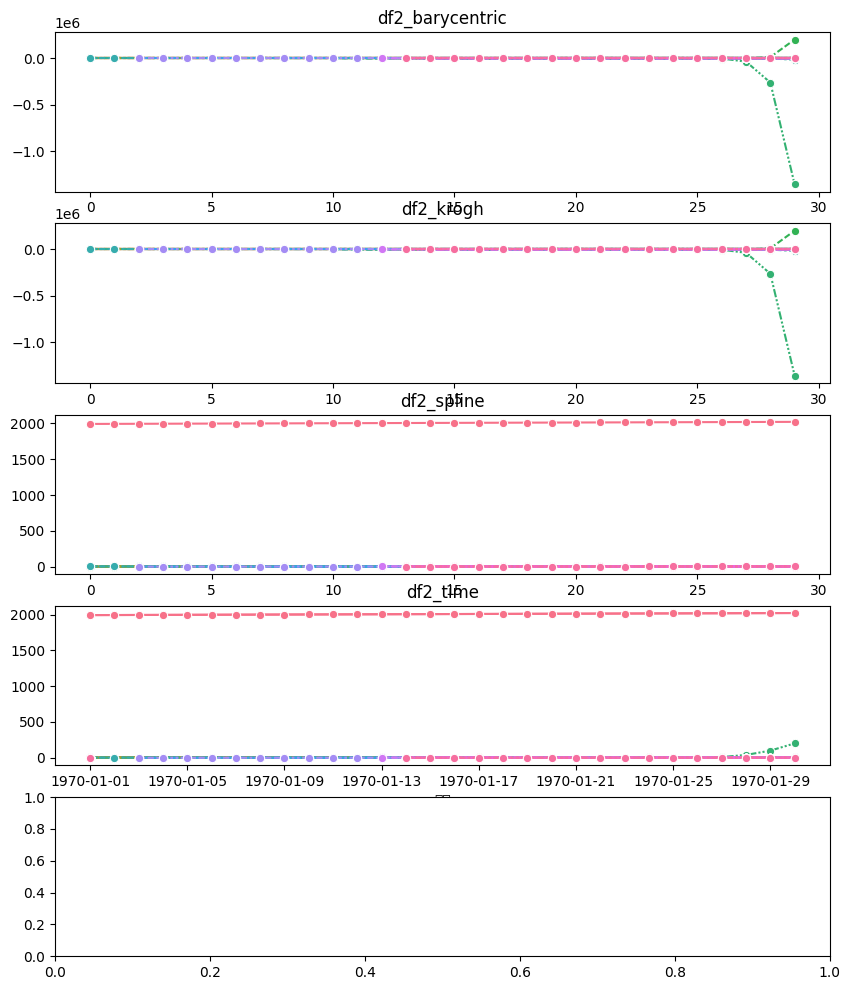

In [ ]:
fig, axs = plt.subplots(5,1,figsize=(10,12))
sns.lineplot(data= df2_barycentric, marker='o', ax=axs[0], legend=False)
axs[0].set_title('df2_barycentric')
sns.lineplot(data=df2_krogh , marker='o', ax=axs[1], legend=False)
axs[1].set_title('df2_krogh')
sns.lineplot(data=df2_spline , marker='o', ax=axs[2], legend=False)
axs[2].set_title('df2_spline')
sns.lineplot(data=df2_pchip , marker='o', ax=axs[3], legend=False)
axs[3].set_title('df2_pchip')
sns.lineplot(data=df2_cubicspline , marker='o', ax=axs[3], legend=False)
axs[3].set_title('df2_cubicspline')
sns.lineplot(data=df2_time , marker='o', ax=axs[3], legend=False)
axs[3].set_title('df2_time')

In [ ]:
df2_barycentric['사회복지시설수']    #18,19열이 결측값이었음

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10       -1.249467
11       -1.246054
12       -1.230179
13       -1.224672
14       -1.215173
15       -0.809856
16       -0.404571
17        1.002464
18        2.546713
19        2.150875
20        0.690433
21        0.671596
22        1.251701
23        0.592831
24        1.011738
25        0.530747
26        0.596631
27        1.031831
28    -1235.240305
29   -15345.293285
Name: 사회복지시설수, dtype: float64

In [ ]:
df2_krogh['사회복지시설수'] #df2_barycentric와 동일

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10       -1.249467
11       -1.246054
12       -1.230179
13       -1.224672
14       -1.215173
15       -0.809856
16       -0.404571
17        1.002464
18        2.546713
19        2.150875
20        0.690433
21        0.671596
22        1.251701
23        0.592831
24        1.011738
25        0.530747
26        0.596631
27        1.031831
28    -1235.240305
29   -15345.293285
Name: 사회복지시설수, dtype: float64

In [ ]:
df2_spline['사회복지시설수']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10   -1.249467
11   -1.246054
12   -1.230179
13   -1.224672
14   -1.215173
15   -0.809856
16   -0.404571
17    1.002464
18    0.231928
19    0.385918
20    0.690433
21    0.671596
22    1.251701
23    0.592831
24    1.011738
25    0.530747
26    0.596631
27    1.031831
28    0.845061
29    0.793103
Name: 사회복지시설수, dtype: float64

In [ ]:
df2_pchip['사회복지시설수']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10   -1.249467
11   -1.246054
12   -1.230179
13   -1.224672
14   -1.215173
15   -0.809856
16   -0.404571
17    1.002464
18    0.927921
19    0.784039
20    0.690433
21    0.671596
22    1.251701
23    0.592831
24    1.011738
25    0.530747
26    0.596631
27    1.031831
28    1.564149
29    1.376986
Name: 사회복지시설수, dtype: float64

In [ ]:
df2_cubicspline['사회복지시설수']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10   -1.249467
11   -1.246054
12   -1.230179
13   -1.224672
14   -1.215173
15   -0.809856
16   -0.404571
17    1.002464
18    1.563654
19    1.234680
20    0.690433
21    0.671596
22    1.251701
23    0.592831
24    1.011738
25    0.530747
26    0.596631
27    1.031831
28    0.871270
29   -0.850132
Name: 사회복지시설수, dtype: float64

In [ ]:
df2_time['사회복지시설수']

시점
1970-01-01 00:00:00.000001993         NaN
1970-01-01 00:00:00.000001994         NaN
1970-01-01 00:00:00.000001995         NaN
1970-01-01 00:00:00.000001996         NaN
1970-01-01 00:00:00.000001997         NaN
1970-01-01 00:00:00.000001998         NaN
1970-01-01 00:00:00.000001999         NaN
1970-01-01 00:00:00.000002000         NaN
1970-01-01 00:00:00.000002001         NaN
1970-01-01 00:00:00.000002002         NaN
1970-01-01 00:00:00.000002003   -1.249467
1970-01-01 00:00:00.000002004   -1.246054
1970-01-01 00:00:00.000002005   -1.230179
1970-01-01 00:00:00.000002006   -1.224672
1970-01-01 00:00:00.000002007   -1.215173
1970-01-01 00:00:00.000002008   -0.809856
1970-01-01 00:00:00.000002009   -0.404571
1970-01-01 00:00:00.000002010    1.002464
1970-01-01 00:00:00.000002011    0.898454
1970-01-01 00:00:00.000002012    0.794443
1970-01-01 00:00:00.000002013    0.690433
1970-01-01 00:00:00.000002014    0.671596
1970-01-01 00:00:00.000002015    1.251701
1970-01-01 00:00:00.000002016  

In [ ]:
#데이터 출력
df2_krogh.to_csv('df2_krogh.csv', index=False,encoding='cp949')
df2_spline.to_csv('df2_spline.csv', index=False,encoding='cp949')
df2_pchip.to_csv('df2_pchip.csv', index=False,encoding='cp949')
df2_cubicspline.to_csv('df2_cubicspline.csv', index=False,encoding='cp949')
df2_time.to_csv('df2_time.csv', index=False,encoding='cp949')
#df2_krogh, df2_spline, df2_pchip, df2_cubicspline, df2_time

### **2. MICE로 완전한 데이터 제작**

In [ ]:
###(2) mice로 보간

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer
from spicy import interpolate
from scipy.interpolate import interp1d

#df2_krogh.set_index('시점',inplace=True)
#df2_spline.set_index('시점',inplace=True)
#df2_pchip.set_index('시점',inplace=True)
#df2_cubicspline.set_index('시점',inplace=True)
#df2_time['시점'] = pd.to_datetime(df2_time['시점'])
#df2_time.set_index('시점',inplace=True)

mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice_k=mice_imputer.fit_transform(df2_krogh)
df_mice_k = pd.DataFrame(df_mice_k, columns=df2_krogh.columns)

mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice_s=mice_imputer.fit_transform(df2_spline)
df_mice_s = pd.DataFrame(df_mice_s, columns=df2_spline.columns)

mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice_t=mice_imputer.fit_transform(df2_time)
df_mice_t = pd.DataFrame(df_mice_t, columns=df2_time.columns)

mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice_p=mice_imputer.fit_transform(df2_pchip)
df_mice_p = pd.DataFrame(df_mice_p, columns=df2_pchip.columns)

mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice_cs=mice_imputer.fit_transform(df2_cubicspline)
df_mice_cs= pd.DataFrame(df_mice_p, columns=df2_cubicspline.columns)

print(df_mice_p.isnull().sum().sum())
print(df_mice_s.isnull().sum().sum())
print(df_mice_t.isnull().sum().sum())
print(df_mice_cs.isnull().sum().sum())
print(df_mice_k.isnull().sum().sum())
#df2_krogh, df2_spline, df2_pchip, df2_cubicspline, df2_time

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


0
0
0
0
0


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Text(0.5, 1.0, 'k')

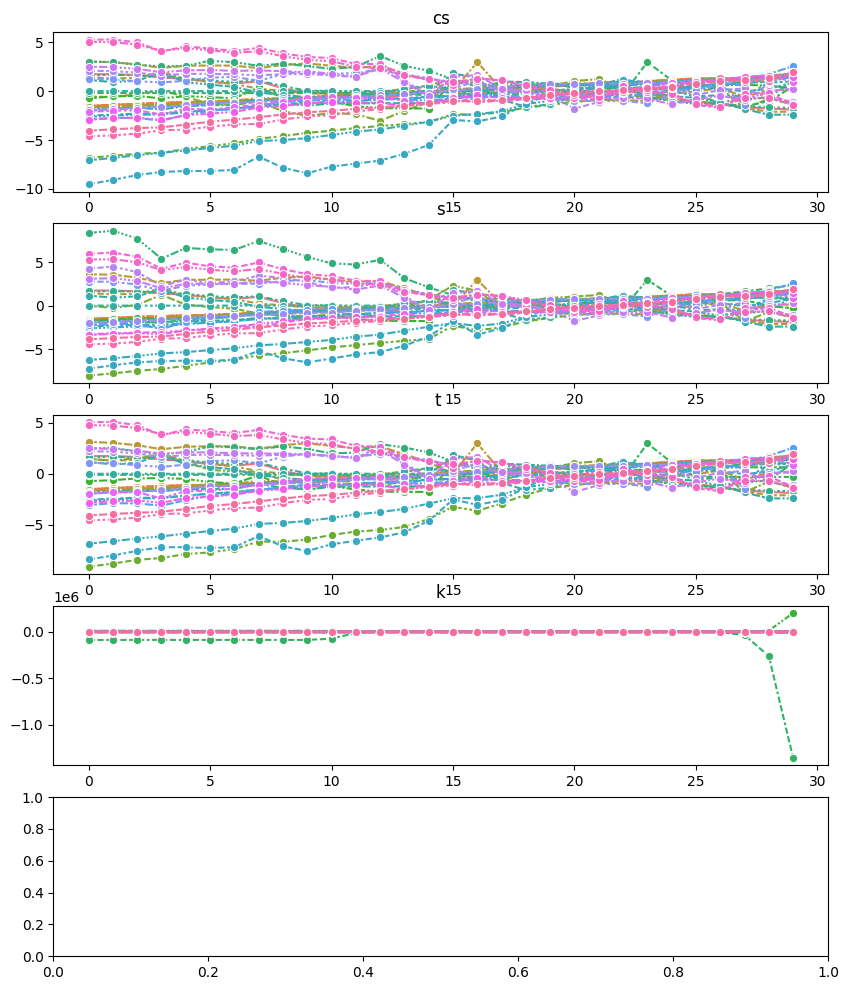

In [ ]:
fig, axs = plt.subplots(5,1,figsize=(10,12))
sns.lineplot(data= df_mice_cs, marker='o', ax=axs[0], legend=False)
axs[0].set_title('cs')
sns.lineplot(data=df_mice_s , marker='o', ax=axs[1], legend=False)
axs[1].set_title('s')
sns.lineplot(data=df_mice_t , marker='o', ax=axs[2], legend=False)
axs[2].set_title('t ')
sns.lineplot(data=df_mice_p , marker='o', ax=axs[3], legend=False)
axs[3].set_title('p')
sns.lineplot(data=df_mice_k , marker='o', ax=axs[3], legend=False)
axs[3].set_title('k')

In [ ]:
df_mice_p.to_csv('df_mice_p.csv', index=False,encoding='cp949')
df_mice_t.to_csv('df_mice_t.csv', index=False,encoding='cp949')
df_mice_s.to_csv('df_mice_s.csv', index=False,encoding='cp949')
df_mice_k.to_csv('df_mice_k.csv', index=False,encoding='cp949')
df_mice_cs.to_csv('df_mice_cs.csv', index=False,encoding='cp949')

### **3. ARIMA 보간**

In [ ]:
!pip install pmdarima

import numpy as np
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00


In [ ]:
df_k=pd.read_csv('df2_krogh.csv',encoding='cp949')
df_p=pd.read_csv('df2_pchip.csv',encoding='cp949')
df_s=pd.read_csv('df2_spline.csv',encoding='cp949')
df_t=pd.read_csv('df2_time.csv',encoding='cp949')
#df_cs=pd.read_csv('df2_cubicspline.csv,encoding='cp949')

In [ ]:
df_k['시점'] = pd.to_datetime(df_k['시점'])
df_s['시점'] = pd.to_datetime(df_s['시점'])
df_p['시점'] = pd.to_datetime(df_p['시점'])
#df_cs['시점'] = pd.to_datetime(df_cs['시점'])
#df_t['시점'] = pd.to_datetime(df_t['시점'])

df_k.set_index('시점',inplace=True)
df_s.set_index('시점',inplace=True)
df_p.set_index('시점',inplace=True)
#df_cs.set_index('시점',inplace=True)
#df_t.set_index('시점',inplace=True)

**1차 Trial: 모든 보간을 ARIMA로 진행**

In [ ]:
def impute_missing_values(df):
    imputed_df = df.copy()

    for column in df.columns:
        data = df[column]

        # 결측값이 있는 데이터만 처리
        if data.isnull().sum() > 0:
            # 임시로 결측값을 선형 보간으로 채움
            data_interpolated_temp = data.interpolate(method='spline',order=1)

            # 결측값이 여전히 있는 경우 0으로 채움
            data_interpolated_temp = data_interpolated_temp.fillna(0)

            # auto_arima 함수 사용하여 최적의 차수 결정
            stepwise_model = auto_arima(data_interpolated_temp,
                                        start_p=1, start_q=1,
                                        max_p=3, max_q=3,
                                        seasonal=False,
                                        trace=False,
                                        error_action='ignore',
                                        suppress_warnings=True,
                                        stepwise=True)

            # 최적 모델의 차수
            order = stepwise_model.order
            print(f'Optimal order for column {column}: {order}')

            # ARIMA 모델을 사용하여 결측값 보간
            model = stepwise_model.fit(data_interpolated_temp.dropna())
            forecast = model.predict(n_periods=int(data.isnull().sum()))

            # 결측값 위치에 예측 값 삽입
            data[data.isnull()] = forecast
            imputed_df[column] = data

    return imputed_df

In [ ]:
# 각 데이터 프레임에 대해 결측값을 보간
df_k_imputed = impute_missing_values(df_k)
df_s_imputed = impute_missing_values(df_s)
df_p_imputed = impute_missing_values(df_p)
df_t_imputed = impute_missing_values(df_t)
#df_cs_imputed = impute_missing_values(df_cs)

# 결과 출력
#print("Imputed krogh:")
#print(df_k_imputed)
#print("Imputed spline:")
#print(df_s_imputed)
#print("Imputed pchip:")
#print(df_p_imputed)
#print("Imputed time:")
#print(df_t_imputed)
#print("Imputed cubicspline:")
#print(df_cs_imputed)

Optimal order for column 보육비_월평균_만원: (0, 0, 0)
Optimal order for column 일반적으로사람들을신뢰하는정도: (1, 0, 0)
Optimal order for column 경상소득_가구당_전년도_만원: (1, 0, 0)


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Optimal order for column 우울인식_평균_점: (0, 0, 0)
Optimal order for column 선천성기형질환_아동: (0, 0, 1)
Optimal order for column 출산경험_유: (0, 0, 1)
Optimal order for column 사회복지시설수: (1, 0, 0)
Optimal order for column 우울감.경험률: (0, 0, 1)
Optimal order for column 여성.경제활동인구수.천명.: (0, 1, 0)
Optimal order for column 모.육아휴직.사용률...: (1, 0, 0)
Optimal order for column 모.육아휴직자.수: (0, 0, 1)
Optimal order for column X1인당.개인소득.천원.: (0, 1, 0)
Optimal order for column X1인당.민간소비.천원.: (0, 1, 0)
Optimal order for column 월평균.사교육비.만원.: (1, 0, 0)
Optimal order for column 사교육.참여율...: (1, 0, 0)
Optimal order for column 생활물가지수.2020.100.: (0, 1, 0)
Optimal order for column 스트레스인지율...: (0, 0, 1)
Optimal order for column 주관적.건강인지율...: (0, 0, 1)
Optimal order for column 아파트.매매.실거래.평균가격.만원...: (2, 0, 0)
Optimal order for column 연립다세대.매매.실거래.평균가격.만원...: (1, 0, 0)
Optimal order for column 총근로일수..일.: (1, 0, 0)
Optimal order for column 총근로시간..시간.: (1, 0, 0)
Optimal order for column 시간당임금총액..원.: (1, 0, 0)
Optimal order for column 

In [ ]:
df_k_imputed

,합계출산율,국내총생산.명목.원화표시...십억원.,국민총소득.명목.원화표시...십억원.,국민처분가능소득.명목...십억원.,노동비용총액..천원.,소비자물가지수,보육비_월평균_만원,혼인건수,남자초혼연령,여자초혼연령,...,사교육.참여율...,생활물가지수.2020.100.,스트레스인지율...,주관적.건강인지율...,아파트.매매.실거래.평균가격.만원...,연립다세대.매매.실거래.평균가격.만원...,총근로일수..일.,총근로시간..시간.,시간당임금총액..원.,월임금총액..천원.
시점,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000001993,1.741150,-1.505640,-1.491716,-1.507642,-1.629346,-1.788777,NaN,1.450872,-1.605012,-1.625393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001994,1.749443,-1.404468,-1.392846,-1.395749,-1.629346,-1.625332,NaN,1.291036,-1.539105,-1.559099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001995,1.658218,-1.290615,-1.281727,-1.287905,-1.461397,-1.501104,NaN,1.381534,-1.456722,-1.467307,...,NaN,-1.758736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001996,1.409423,-1.195534,-1.188166,-1.193641,-1.353964,-1.358494,NaN,1.996224,-1.434753,-1.401013,...,NaN,-1.606733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001997,1.256000,-1.105238,-1.101190,-1.105567,-1.195802,-1.223571,NaN,1.220821,-1.330400,-1.268425,...,NaN,-1.462923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001998,0.953299,-1.113687,-1.116559,-1.146183,-1.014629,-0.985087,NaN,0.959940,-1.198587,-1.110339,...,NaN,-1.208732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001999,0.791583,-1.017942,-1.021392,-1.043534,-0.980188,-0.957345,NaN,0.739001,-1.066773,-0.972652,...,NaN,-1.179163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002000,1.019645,-0.911705,-0.912859,-0.926767,-0.676490,-0.879633,NaN,0.261163,-0.951437,-0.870661,...,NaN,-1.096333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002001,0.310579,-0.813932,-0.817178,-0.830119,-0.763303,-0.736577,NaN,0.030268,-0.803147,-0.722775,...,NaN,-0.943854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_s_imputed

,합계출산율,국내총생산.명목.원화표시...십억원.,국민총소득.명목.원화표시...십억원.,국민처분가능소득.명목...십억원.,노동비용총액..천원.,소비자물가지수,보육비_월평균_만원,혼인건수,남자초혼연령,여자초혼연령,...,사교육.참여율...,생활물가지수.2020.100.,스트레스인지율...,주관적.건강인지율...,아파트.매매.실거래.평균가격.만원...,연립다세대.매매.실거래.평균가격.만원...,총근로일수..일.,총근로시간..시간.,시간당임금총액..원.,월임금총액..천원.
시점,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000001993,1.741150,-1.505640,-1.491716,-1.507642,-1.629346,-1.788777,NaN,1.450872,-1.605012,-1.625393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001994,1.749443,-1.404468,-1.392846,-1.395749,-1.629346,-1.625332,NaN,1.291036,-1.539105,-1.559099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001995,1.658218,-1.290615,-1.281727,-1.287905,-1.461397,-1.501104,NaN,1.381534,-1.456722,-1.467307,...,NaN,-1.758736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001996,1.409423,-1.195534,-1.188166,-1.193641,-1.353964,-1.358494,NaN,1.996224,-1.434753,-1.401013,...,NaN,-1.606733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001997,1.256000,-1.105238,-1.101190,-1.105567,-1.195802,-1.223571,NaN,1.220821,-1.330400,-1.268425,...,NaN,-1.462923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001998,0.953299,-1.113687,-1.116559,-1.146183,-1.014629,-0.985087,NaN,0.959940,-1.198587,-1.110339,...,NaN,-1.208732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001999,0.791583,-1.017942,-1.021392,-1.043534,-0.980188,-0.957345,NaN,0.739001,-1.066773,-0.972652,...,NaN,-1.179163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002000,1.019645,-0.911705,-0.912859,-0.926767,-0.676490,-0.879633,NaN,0.261163,-0.951437,-0.870661,...,NaN,-1.096333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000002001,0.310579,-0.813932,-0.817178,-0.830119,-0.763303,-0.736577,NaN,0.030268,-0.803147,-0.722775,...,NaN,-0.943854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2차 Trial: 사이값 보간 데이터로 보간 진행**

In [ ]:
df_s=pd.read_csv('df_mice_s.csv',encoding='cp949')
df_cs=pd.read_csv('df_mice_cs.csv',encoding='cp949')
df_p=pd.read_csv('df_mice_p.csv',encoding='cp949')
df_t=pd.read_csv('df_mice_t.csv',encoding='cp949')
df_k=pd.read_csv('df_mice_k.csv',encoding='cp949')

In [ ]:
def impute_missing_values(df):
    imputed_df = df.copy()

    for column in df.columns:
        data = df[column]

        # 결측값이 있는 데이터만 처리
        if data.isnull().sum() > 0:
            # 임시로 결측값을 선형 보간으로 채움
#            data_interpolated_temp = data.interpolate(method='linear')

            # auto_arima 함수 사용하여 최적의 차수 결정
            stepwise_model = auto_arima(data_interpolated_temp,
                                        start_p=1, start_q=1,
                                        max_p=3, max_q=3,
                                        seasonal=False,
                                        trace=False,
                                        error_action='ignore',
                                        suppress_warnings=True,
                                        stepwise=True)

            # 최적 모델의 차수
            order = stepwise_model.order
            print(f'Optimal order for column {column}: {order}')

            # ARIMA 모델을 사용하여 결측값 보간
            model = stepwise_model.fit(data_interpolated_temp.dropna())
            forecast = model.predict(n_periods=int(data.isnull().sum()))

            # 결측값 위치에 예측 값 삽입
            data[data.isnull()] = forecast
            imputed_df[column] = data

    return imputed_df

In [ ]:
df_s_imputed = impute_missing_values(df_s)
df_cs_imputed = impute_missing_values(df_cs)
df_t_imputed = impute_missing_values(df_t)
df_p_imputed = impute_missing_values(df_p)
df_k_imputed = impute_missing_values(df_k)

In [ ]:
df_s_imputed

,합계출산율,국내총생산.명목.원화표시...십억원.,국민총소득.명목.원화표시...십억원.,국민처분가능소득.명목...십억원.,노동비용총액..천원.,소비자물가지수,보육비_월평균_만원,혼인건수,남자초혼연령,여자초혼연령,...,사교육.참여율...,생활물가지수.2020.100.,스트레스인지율...,주관적.건강인지율...,아파트.매매.실거래.평균가격.만원...,연립다세대.매매.실거래.평균가격.만원...,총근로일수..일.,총근로시간..시간.,시간당임금총액..원.,월임금총액..천원.
0,1.741150,-1.505640,-1.491716,-1.507642,-1.629346,-1.788777,3.624591,1.450872,-1.605012,-1.625393,...,2.770875,-1.973121,4.257846,3.101116,-3.272330,-3.377722,5.979407,5.314580,-4.440487,-3.876490
1,1.749443,-1.404468,-1.392846,-1.395749,-1.629346,-1.625332,3.567610,1.291036,-1.539105,-1.559099,...,2.760979,-1.891480,4.512930,3.161779,-3.182584,-3.233598,6.111064,5.354597,-4.371214,-3.734376
2,1.658218,-1.290615,-1.281727,-1.287905,-1.461397,-1.501104,3.234719,1.381534,-1.456722,-1.467307,...,2.431637,-1.758736,3.870163,2.849458,-3.094189,-3.154772,5.650979,5.011397,-4.171021,-3.602059
3,1.409423,-1.195534,-1.188166,-1.193641,-1.353964,-1.358494,2.613907,1.996224,-1.434753,-1.401013,...,1.737244,-1.606733,2.269782,2.006495,-3.046544,-3.269335,4.255747,4.095052,-3.793528,-3.555274
4,1.256000,-1.105238,-1.101190,-1.105567,-1.195802,-1.223571,2.981232,1.220821,-1.330400,-1.268425,...,2.285292,-1.462923,2.990875,2.518184,-2.820248,-2.849038,4.948259,4.456759,-3.728637,-3.247824
5,0.953299,-1.113687,-1.116559,-1.146183,-1.014629,-0.985087,2.988225,0.959940,-1.198587,-1.110339,...,2.465415,-1.208732,2.610112,2.555375,-2.748415,-2.629651,4.530938,4.138280,-3.397572,-2.965460
6,0.791583,-1.017942,-1.021392,-1.043534,-0.980188,-0.957345,3.014855,0.739001,-1.066773,-0.972652,...,2.511257,-1.179163,2.808596,2.510171,-2.497545,-2.410058,4.382408,3.951999,-3.202853,-2.783442
7,1.019645,-0.911705,-0.912859,-0.926767,-0.676490,-0.879633,2.879439,0.261163,-0.951437,-0.870661,...,2.544235,-1.096333,3.451919,2.839346,-2.422038,-2.117767,4.978290,4.230766,-3.151002,-2.490513
8,0.310579,-0.813932,-0.817178,-0.830119,-0.763303,-0.736577,3.223592,0.030268,-0.803147,-0.722775,...,2.842283,-0.943854,3.189665,2.634211,-1.960805,-1.786100,4.206343,3.658646,-2.739047,-2.271882
9,-0.232623,-0.676734,-0.678619,-0.673700,-0.638911,-0.635468,3.361842,-0.198045,-0.682318,-0.605485,...,2.961808,-0.836086,2.728189,2.371304,-1.527010,-1.473622,3.630496,3.191041,-2.396911,-2.049784


In [ ]:
df_s_imputed.isnull().sum().sum()
df_cs_imputed.isnull().sum().sum()
df_t_imputed.isnull().sum().sum()
df_p_imputed.isnull().sum().sum()
df_k_imputed.isnull().sum().sum()

0

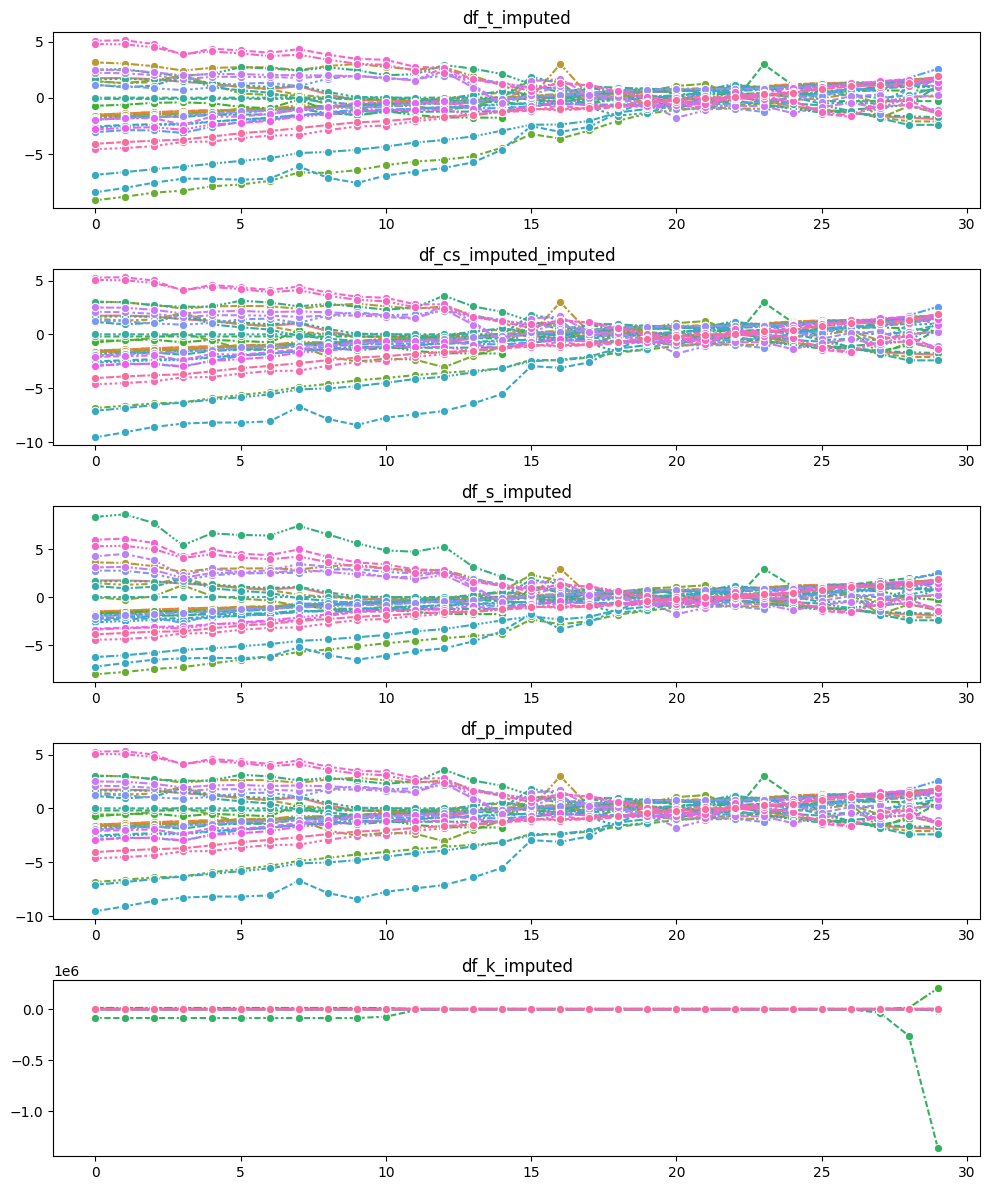

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(10, 12))

sns.lineplot(data=df_t_imputed, marker='o', ax=axs[0], legend=False)
axs[0].set_title('df_t_imputed')

sns.lineplot(data=df_cs_imputed, marker='o', ax=axs[1], legend=False)
axs[1].set_title('df_cs_imputed_imputed')

sns.lineplot(data=df_s_imputed, marker='o', ax=axs[2], legend=False)
axs[2].set_title('df_s_imputed')

sns.lineplot(data=df_p_imputed, marker='o', ax=axs[3], legend=False)
axs[3].set_title('df_p_imputed')

sns.lineplot(data=df_k_imputed, marker='o', ax=axs[4], legend=False)
axs[4].set_title('df_k_imputed')

plt.tight_layout()
plt.show()


In [ ]:
df_t_imputed.to_csv('df_t_arima.csv', index=False,encoding='cp949')
df_s_imputed.to_csv('df_s_arima.csv', index=False,encoding='cp949')

# **(4) 임의 분석**
**- 중복 변수 제거하고 재분석**

**- 데이터는 20년 분기별 자료를 사용**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer
from spicy import interpolate
from scipy.interpolate import interp1d

In [ ]:
df=pd.read_csv('data2qst.csv',encoding='utf-8')

**1차 사이값 보간**

In [ ]:
df2=df
df2

#1. polyonmial(다항식 보간)
df2_polynomial=df2.interpolate('polynomial',order=2)
print(df2_polynomial.isnull().sum().sum())
#print(df2_polynomial.to_string())

#4. nearest
df2_nearest=df2.interpolate('nearest')
print(df2_nearest.isnull().sum().sum())

#5. slinear
df2_slinear=df2.interpolate('slinear')
print(df2_slinear.isnull().sum().sum())

#6. cubic
df2_cubic=df2.interpolate('cubic')
print(df2_cubic.isnull().sum().sum())

#7. barycentric*
df2_barycentric=df2.interpolate('barycentric')
print(df2_barycentric.isnull().sum().sum())

#8. krogh*
df2_krogh=df2.interpolate('krogh')
print(df2_krogh.isnull().sum().sum())

#9. spline*
df2_spline=df2.interpolate('spline',order=2)
print(df2_spline.isnull().sum().sum())

#10. from_derivatives
df2_from_derivatives=df2.interpolate('from_derivatives')
print(df2_from_derivatives.isnull().sum().sum())

#11. piecewise_polynomial
df2_piecewise_polynomial=df2.interpolate('piecewise_polynomial')
print(df2_piecewise_polynomial.isnull().sum().sum())

#12. pchip*
df2_pchip=df2.interpolate('pchip')
print(df2_pchip.isnull().sum().sum())

#13. akima
df2_akima=df2.interpolate('akima')
print(df2_akima.isnull().sum().sum())

#14. cubicspline*
df2_cubicspline=df2.interpolate('cubicspline')
print(df2_cubicspline.isnull().sum().sum())

480
480
480
480
332
332
332
480
480
332
480
332


In [ ]:
df2['time'] = pd.to_datetime(df['time'])
df2.set_index('time',inplace=True)
df2

#2. time
df2_time=df2.interpolate('time')
print(df2_time.isnull().sum().sum())
#print(df2_time.to_string())

332


Text(0.5, 1.0, 'df2_time')

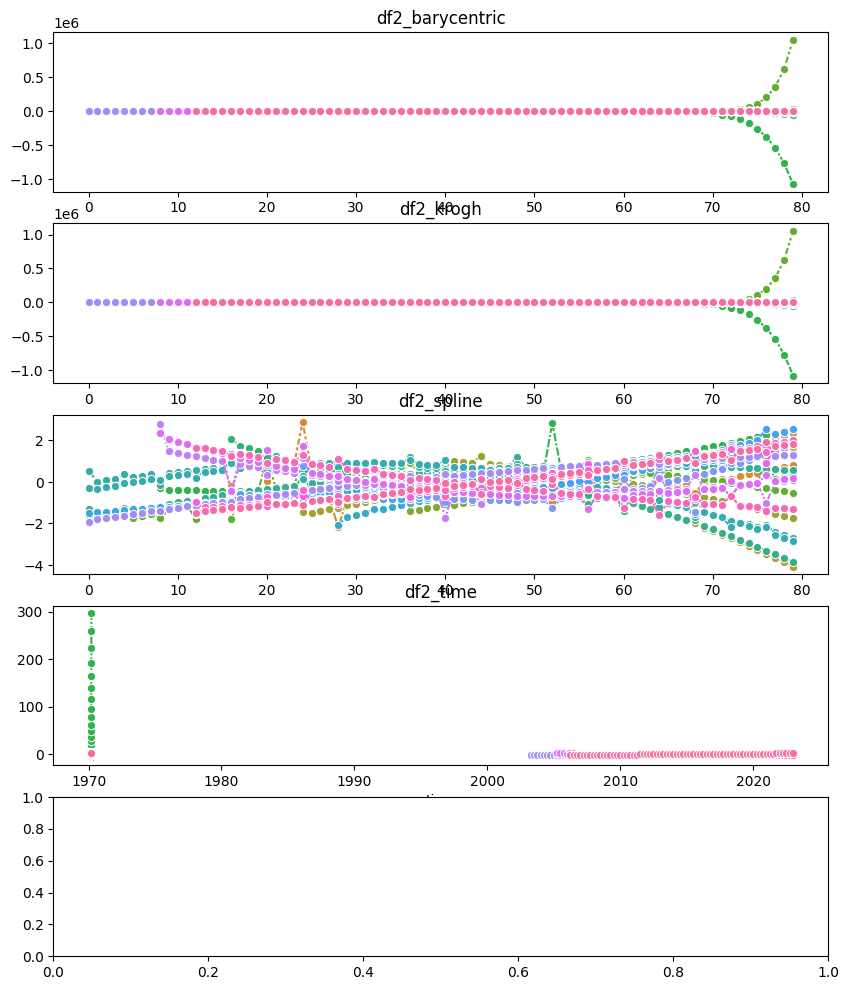

In [ ]:
fig, axs = plt.subplots(5,1,figsize=(10,12))
sns.lineplot(data= df2_barycentric, marker='o', ax=axs[0], legend=False)
axs[0].set_title('df2_barycentric')
sns.lineplot(data=df2_krogh , marker='o', ax=axs[1], legend=False)
axs[1].set_title('df2_krogh')
sns.lineplot(data=df2_spline , marker='o', ax=axs[2], legend=False)
axs[2].set_title('df2_spline')
sns.lineplot(data=df2_pchip , marker='o', ax=axs[3], legend=False)
axs[3].set_title('df2_pchip')
sns.lineplot(data=df2_cubicspline , marker='o', ax=axs[3], legend=False)
axs[3].set_title('df2_cubicspline')
sns.lineplot(data=df2_time , marker='o', ax=axs[3], legend=False)
axs[3].set_title('df2_time')

**- 2차 MICE 보간**

**- spline이랑 krogh를 살펴보려함**

In [ ]:
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder

df2_krogh['time'] = pd.to_datetime(df2_krogh['time'])
df2_krogh['time'] = df2_krogh['time'].astype(int)

df2_spline['time'] = pd.to_datetime(df2_spline['time'])
df2_spline['time'] = df2_spline['time'].astype(int)

mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice_k=mice_imputer.fit_transform(df2_krogh)
df_mice_k = pd.DataFrame(df_mice_k, columns=df2_krogh.columns)

mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체
df_mice_s=mice_imputer.fit_transform(df2_spline)
df_mice_s = pd.DataFrame(df_mice_s, columns=df2_spline.columns)

Text(0.5, 1.0, 'df_mice_k')

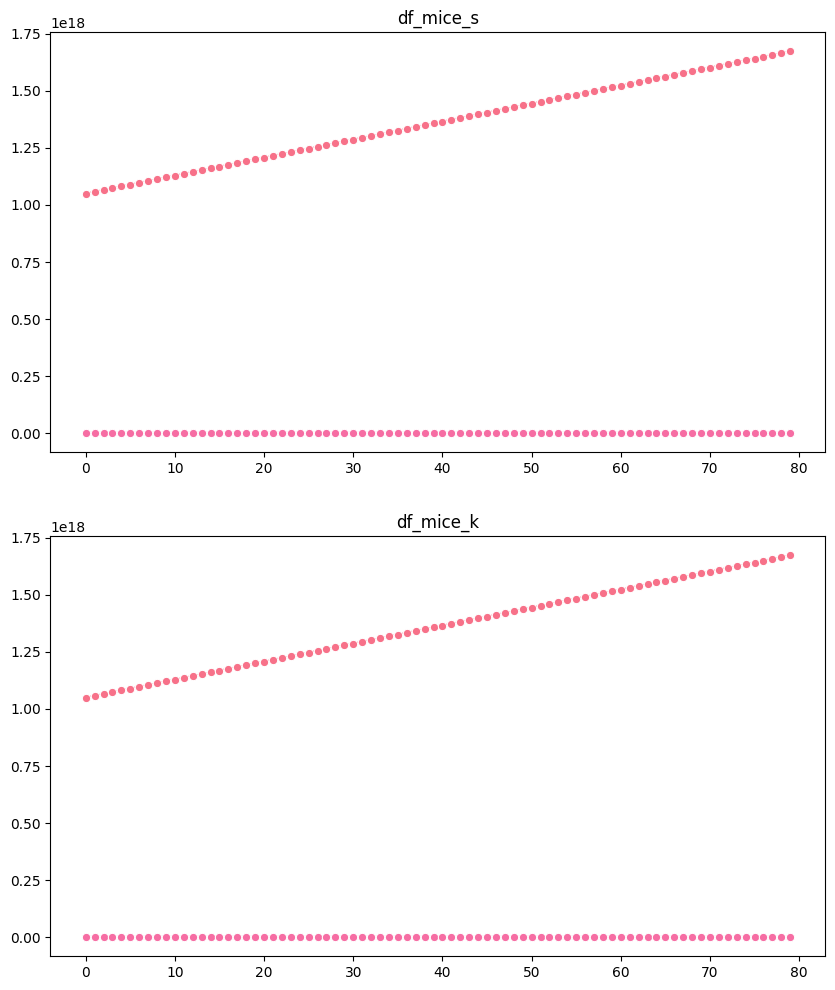

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(10,12))
sns.lineplot(data= df_mice_s, marker='o', ax=axs[0], legend=False)
axs[0].set_title('df_mice_s')
sns.lineplot(data=df_mice_k , marker='o', ax=axs[1], legend=False)
axs[1].set_title('df_mice_k')

In [ ]:
df_mice_k

,time,국민총소득.명목.원화표시...십억원.,노동비용총액..천원.,소비자물가지수,보육비_월평균_만원,사교육비_월평균_만원,혼인건수,여자초혼연령,일반적으로사람들을신뢰하는정도,경상소득_가구당_전년도_만원,...,X1인당.개인소득.천원.,월평균.사교육비.만원.,사교육.참여율...,생활물가지수.2020.100.,스트레스인지율...,주관적.건강인지율...,아파트.매매.실거래.평균가격.만원...,연립다세대.매매.실거래.평균가격.만원...,총근로시간..시간.,시간당임금총액..원.
0,1.049069e+18,-1.547181,-1.387131,-1.776829,19.367043,-12.930932,-1.076249,-3.872840,4.112905,-5.329170,...,-1.516082,-1.866838,-3.321412,-1.939940,27.973905,59.383789,13.643197,3.587805,33.538120,-21.485282
1,1.056931e+18,17.146317,7.530817,-15.543977,-40.557866,-153.422040,-15.579594,-5.506681,6.384944,-6.268506,...,-35.303872,0.775183,-8.927452,-2.746979,-19.743956,57.633175,4.830694,3.456577,3.030618,-5.401701
2,1.064880e+18,11.648456,4.516523,-11.034464,-21.490784,-108.528862,-10.957953,-4.897422,5.551202,-5.844373,...,-23.929250,-0.027854,-7.155616,-2.221954,-4.491847,58.173218,7.740726,3.575221,12.726760,-10.481367
3,1.072829e+18,3.497342,0.605274,-4.981396,4.842862,-46.532868,-4.683709,-4.085593,4.436013,-5.291502,...,-9.333982,-1.148115,-4.990134,-1.796579,15.826067,58.890625,11.541717,3.707027,25.638147,-17.241886
4,1.080691e+18,-1.375644,-1.553796,-1.548433,24.712323,0.375751,-0.569394,-3.447158,3.668216,-4.847994,...,-1.344552,-1.929492,-5.352898,-1.639069,25.214551,59.134935,12.640781,3.689589,30.821895,-19.863756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.640909e+18,13.496590,-28.512224,7.840336,403.574834,779.963912,-1038.048996,4.269168,1.169828,-0.939297,...,75.543466,6.085546,69.258150,-2.910562,148.607524,18.872562,39.022078,1.922907,82.878241,-43.339272
76,1.648685e+18,1.671936,1.766163,1.663841,919.192164,1826.806160,-1771.143462,11.061144,-1.357185,1.533358,...,1.792108,2.570914,1.722315,1.716375,-1.008650,0.322870,0.918784,1.440732,-1.390685,1.921047
77,1.656547e+18,-60.617002,168.957222,-34.544673,1901.448246,3878.015776,-2918.379105,23.793522,-8.354417,10.972690,...,-409.428648,-11.304474,-318.967960,26.751122,-749.748100,-103.044896,-191.971355,-3.400736,-431.263383,232.159557
78,1.664496e+18,-251.736475,697.285913,-152.363418,3675.183741,7676.518517,-4668.370150,45.841006,-22.800788,34.750994,...,-1716.790938,-46.372328,-1242.698598,105.701618,-2972.439605,-430.417138,-770.490695,-22.166416,-1723.168327,923.659455


In [ ]:
df_mice_s   #spline이 제일 괜찮은 듯함.

,time,국민총소득.명목.원화표시...십억원.,노동비용총액..천원.,소비자물가지수,보육비_월평균_만원,사교육비_월평균_만원,혼인건수,여자초혼연령,일반적으로사람들을신뢰하는정도,경상소득_가구당_전년도_만원,...,X1인당.개인소득.천원.,월평균.사교육비.만원.,사교육.참여율...,생활물가지수.2020.100.,스트레스인지율...,주관적.건강인지율...,아파트.매매.실거래.평균가격.만원...,연립다세대.매매.실거래.평균가격.만원...,총근로시간..시간.,시간당임금총액..원.
0,1.049069e+18,-1.547181,-1.387131,-1.776829,0.542163,-2.312150,3.960465,-2.827878,4.264514,-4.526228,...,-1.516082,-2.273402,-0.181660,-1.939940,0.943532,1.268568,-2.135232,-2.172763,1.978527,-2.209762
1,1.056931e+18,-1.540146,-1.524765,-1.755572,0.531134,-2.258734,3.871876,-2.764632,4.189696,-4.441426,...,-1.462064,-2.224013,-0.177747,-1.803203,0.922766,1.240703,-2.085947,-2.122615,1.933340,-2.158640
2,1.064880e+18,-1.499767,-1.485298,-1.695140,0.519963,-2.205486,3.783540,-2.703164,4.116218,-4.361486,...,-1.428454,-2.174323,-0.173835,-1.737398,0.901761,1.212514,-2.037457,-2.073275,1.888219,-2.108535
3,1.072829e+18,-1.459339,-1.445761,-1.635223,0.508792,-2.152232,3.695194,-2.641674,4.042722,-4.281499,...,-1.394609,-2.124631,-0.169922,-1.672270,0.880755,1.184324,-1.988953,-2.023923,1.843092,-2.058415
4,1.080691e+18,-1.375644,-1.553796,-1.548433,0.497759,-2.099651,3.607783,-2.581039,3.969815,-4.201982,...,-1.344552,-2.075499,-0.166034,-1.639069,0.860022,1.156495,-1.941545,-1.975690,1.798874,-2.009599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.640909e+18,1.581578,1.582678,1.324124,0.454138,1.976372,-3.272931,1.565345,-1.315613,1.482319,...,1.658278,2.023279,1.188279,1.235984,-0.076361,-0.058267,1.620434,1.711939,-1.202227,1.597693
76,1.648685e+18,1.671936,1.766163,1.663841,0.543331,2.072668,-3.467900,1.596340,-1.357185,1.533358,...,1.792108,2.570914,1.722315,1.716375,-1.008650,0.322870,0.918784,1.440732,-1.390685,1.921047
77,1.656547e+18,1.669711,1.671921,1.368183,0.636104,2.170527,-3.667360,1.626162,-1.522350,1.659587,...,1.760428,2.285806,1.492209,1.266620,0.008019,0.064671,1.751282,1.861507,-1.247197,1.716777
78,1.664496e+18,1.713851,1.716647,1.389440,0.732458,2.269949,-3.871310,1.654810,-1.628630,1.749303,...,1.811855,2.421387,1.651968,1.280922,0.053118,0.130267,1.817575,1.937585,-1.268605,1.776847


In [ ]:
#데이터 출력
df_mice_s.to_csv('df_mice_s.csv', index=False,encoding='cp949')